In [1]:
%run setup_env.py


In [2]:
from algorithms.nn.nn import Sequential
from algorithms.nn.layers import Dense
import numpy as np
from algorithms.nn.loss import mse, mse_derivative, binary_cross_entropy, binary_cross_entropy_derivative
from algorithms.utils import compute_loss, compute_accuracy

# Visualizing dataset

In [3]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [5]:
# increase dimension of y
y_req = y[:, None]
y_req[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


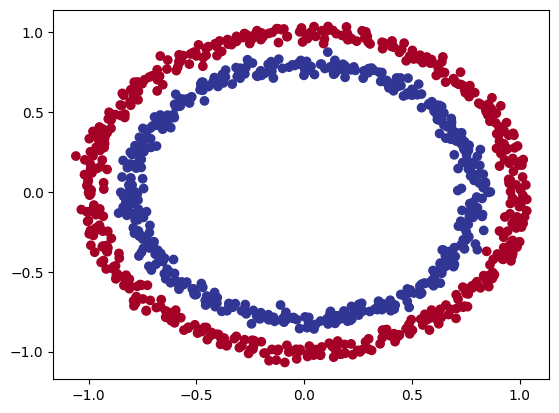

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

# Training the Model and Evaluating

In [12]:
def train_model(model, n_epochs, X, Y, p= True):
    lr_start = 0.0001
    lr_end = 0.00000001

    
    for epoch in range(n_epochs):
        # forward pass
        y_preds = model.forward(X)
        y_preds = np.clip(y_preds, 1e-4, 1 - 1e-4)
        y_val = np.round(y_preds[:, 0])
        # compute loss and accuracy
        loss = compute_loss(y_preds[:, 0], Y, binary_cross_entropy)
        accuracy = compute_accuracy(y_val, Y)
        if p:
            print(f"Epoch {epoch}, loss: {loss} accuracy: {accuracy}")
    
        # backward pass
        gradient = binary_cross_entropy_derivative( Y[:, None], y_preds)
        lr = lr_start - epoch / n_epochs * (lr_start - lr_end)
        model.backward(gradient,lr)
    print("Training complete")

In [29]:
model1 = Sequential(layers=[
    Dense(input_size=2, output_size=4),
    Dense(input_size=4, output_size=1, activation="sigmoid"),
])
model1

Layer(2, 4, None) -> Layer(4, 1, <function sigmoid at 0x7f50675d7700>)

In [30]:
train_model(model1, 1000, X_train, y_train)
    

Epoch 0, loss: 943.7414843393345 accuracy: 0.47
Epoch 1, loss: 920.7350324954067 accuracy: 0.46875
Epoch 2, loss: 898.6175511359056 accuracy: 0.46875
Epoch 3, loss: 877.3912035068192 accuracy: 0.46875
Epoch 4, loss: 857.0613939833979 accuracy: 0.47
Epoch 5, loss: 837.635684871663 accuracy: 0.4725
Epoch 6, loss: 819.122608039345 accuracy: 0.47375
Epoch 7, loss: 801.5304046519367 accuracy: 0.47625
Epoch 8, loss: 784.8657400650488 accuracy: 0.475
Epoch 9, loss: 769.1324528989471 accuracy: 0.475
Epoch 10, loss: 754.3304054255708 accuracy: 0.475
Epoch 11, loss: 740.4545046619378 accuracy: 0.47875
Epoch 12, loss: 727.4939585467698 accuracy: 0.47875
Epoch 13, loss: 715.4318187983622 accuracy: 0.4775
Epoch 14, loss: 704.2448422870971 accuracy: 0.48
Epoch 15, loss: 693.9036780864832 accuracy: 0.4775
Epoch 16, loss: 684.3733609108364 accuracy: 0.4775
Epoch 17, loss: 675.6140670069769 accuracy: 0.47875
Epoch 18, loss: 667.5820691111021 accuracy: 0.47875
Epoch 19, loss: 660.2308152657952 accuracy:

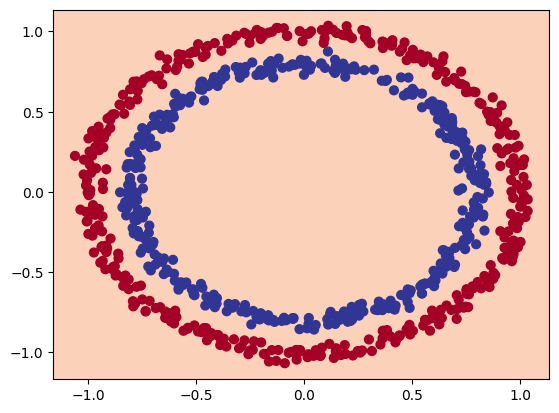

In [28]:
from algorithms.utils import plot_decision_boundary

plot_decision_boundary(model1, X_train, y_train)

## Introducing Non-Linearities
We say how the previous model is just as good as random guesser because straight lines can't enclose circular patterns. We need to introduce non-linearities to the model to make it work. 

| Model Improvement Technique        | Description                                                                                                                                               |
|------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Add more layers                    | Each layer potentially increases the learning capabilities of the model, with each layer able to learn new patterns in the data. More layers make the network deeper. |
| Add more hidden units              | More hidden units per layer mean a potential increase in the model's learning capabilities. More hidden units make the network wider.                       |
| Fitting for longer (more epochs)   | The model might learn more if it has more opportunities to look at the data.                                                                                |
| Changing the activation functions  | Non-linear activation functions can help fit data that can't be fit with only straight lines.                                                              |
| Change the learning rate           | The learning rate decides how much a model should change its parameters each step. Too high and the model overcorrects; too low and it doesn't learn enough. |
| Change the loss function           | Different problems require different loss functions. For example, binary cross-entropy won't work for multi-class classification.                           |
| Use transfer learning              | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem.                                                           |


In [36]:
model2 = Sequential(layers=[
    Dense(input_size=2, output_size=4, activation="relu"),
    Dense(input_size=4, output_size=1, activation="sigmoid"),
])
model2

Layer(2, 4, <function relu at 0x7f50675d7790>) -> Layer(4, 1, <function sigmoid at 0x7f50675d7700>)

In [37]:
train_model(model2, 1000, X_train, y_train)

Epoch 0, loss: 586.5525048250479 accuracy: 0.52625
Epoch 1, loss: 586.5525048250479 accuracy: 0.52625
Epoch 2, loss: 586.5525048250479 accuracy: 0.52625
Epoch 3, loss: 586.5525048250479 accuracy: 0.52625
Epoch 4, loss: 586.5525048250479 accuracy: 0.52625
Epoch 5, loss: 586.5525048250479 accuracy: 0.52625
Epoch 6, loss: 586.5525048250479 accuracy: 0.52625
Epoch 7, loss: 586.5525048250479 accuracy: 0.52625
Epoch 8, loss: 586.5525048250479 accuracy: 0.52625
Epoch 9, loss: 586.5525048250479 accuracy: 0.52625
Epoch 10, loss: 586.5525048250479 accuracy: 0.52625
Epoch 11, loss: 586.5525048250479 accuracy: 0.52625
Epoch 12, loss: 586.5525048250479 accuracy: 0.52625
Epoch 13, loss: 586.5525048250479 accuracy: 0.52625
Epoch 14, loss: 586.5525048250479 accuracy: 0.52625
Epoch 15, loss: 586.5525048250479 accuracy: 0.52625
Epoch 16, loss: 586.5525048250479 accuracy: 0.52625
Epoch 17, loss: 586.5525048250479 accuracy: 0.52625
Epoch 18, loss: 586.5525048250479 accuracy: 0.52625
Epoch 19, loss: 586.55

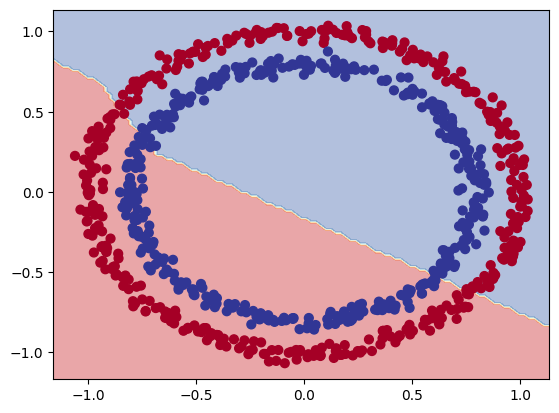

In [38]:
plot_decision_boundary(model2, X_train, y_train)

## Testing various model architectures

In [15]:
models = [
    Sequential(layers=[
        Dense(input_size=2, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=4, activation="relu"),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=8, activation="relu"),
        Dense(input_size=8, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=16, activation="relu"),
        Dense(input_size=16, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=4, activation="relu"),
        Dense(input_size=4, output_size=8),
        Dense(input_size=8, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=8, activation="relu"),
        Dense(input_size=8, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=7, activation="relu"),
        Dense(input_size=7, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=7, activation="relu"),
        Dense(input_size=7, output_size=5, activation="relu"),
        Dense(input_size=5, output_size=1, activation="sigmoid"),
    ]),
]

Training complete
Model 1 accuracy: 0.46, loss: 138.93591185912345
Training complete
Model 2 accuracy: 0.52, loss: 133.9709679895691
Training complete
Model 3 accuracy: 0.525, loss: 139.57939164026266
Training complete
Model 4 accuracy: 0.605, loss: 133.0692876766795
Training complete
Model 5 accuracy: 0.46, loss: 139.40982667005005
Training complete
Model 6 accuracy: 0.605, loss: 132.48198367994237
Training complete
Model 7 accuracy: 0.64, loss: 115.60330476805066
Training complete
Model 8 accuracy: 0.635, loss: 125.74006679217015


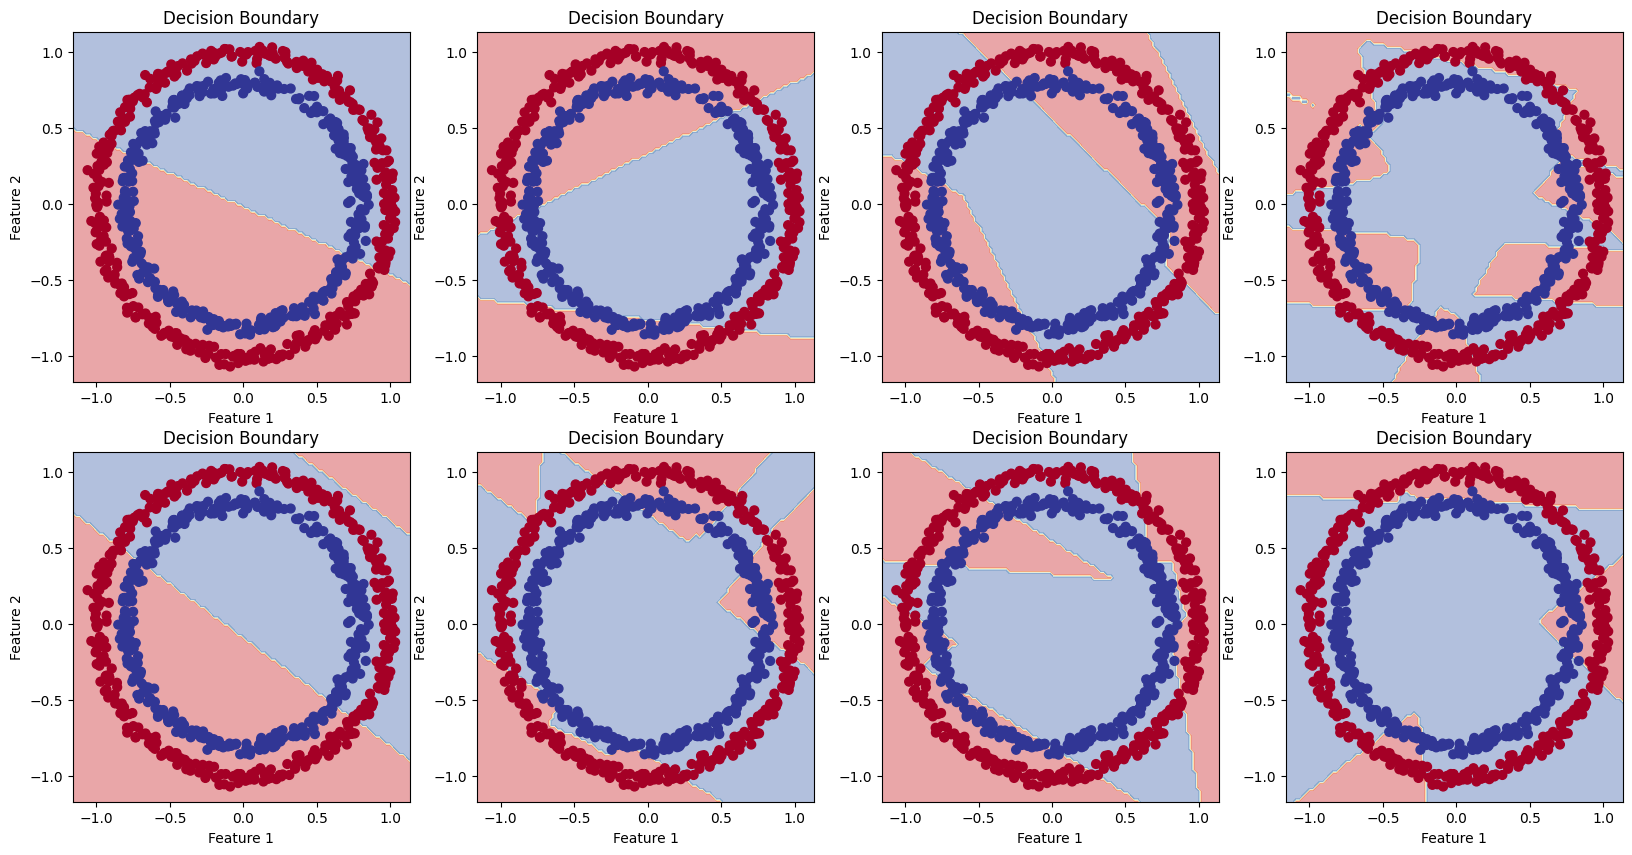

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
from algorithms.utils import plot_decision_boundary_on_axes
for i,model in enumerate(models):
    train_model(model, 5000, X_train, y_train, p=False)
    accuracy = compute_accuracy(np.round(model.forward(X_test)[:, 0]), y_test)
    loss = compute_loss(model.forward(X_test)[:, 0], y_test, binary_cross_entropy)
    
    print(f"Model {i+1} accuracy: {accuracy}, loss: {loss}")
    x, y = i // 4, i %4
    plot_decision_boundary_on_axes(model, X_train, y_train, ax=ax[x][y])

Epoch 0, loss: 625.5112496775994 accuracy: 0.5175
Epoch 1, loss: 615.2764481001245 accuracy: 0.51
Epoch 2, loss: 607.5524722963679 accuracy: 0.5075
Epoch 3, loss: 601.2625283646021 accuracy: 0.50625
Epoch 4, loss: 596.1235729634684 accuracy: 0.5225
Epoch 5, loss: 591.8797556520198 accuracy: 0.5025
Epoch 6, loss: 588.2102498352357 accuracy: 0.50375
Epoch 7, loss: 584.9931746286347 accuracy: 0.47625
Epoch 8, loss: 582.0898107601727 accuracy: 0.495
Epoch 9, loss: 579.5377536922474 accuracy: 0.4975
Epoch 10, loss: 577.2944171451243 accuracy: 0.49375
Epoch 11, loss: 575.2888912416855 accuracy: 0.4875
Epoch 12, loss: 573.5019925994193 accuracy: 0.4875
Epoch 13, loss: 571.8903791696389 accuracy: 0.4975
Epoch 14, loss: 570.4573697783602 accuracy: 0.5075
Epoch 15, loss: 569.1424190021221 accuracy: 0.50875
Epoch 16, loss: 567.9514719818776 accuracy: 0.50875
Epoch 17, loss: 566.8618136189114 accuracy: 0.51125
Epoch 18, loss: 565.8157768323147 accuracy: 0.5125
Epoch 19, loss: 564.8294443325723 acc

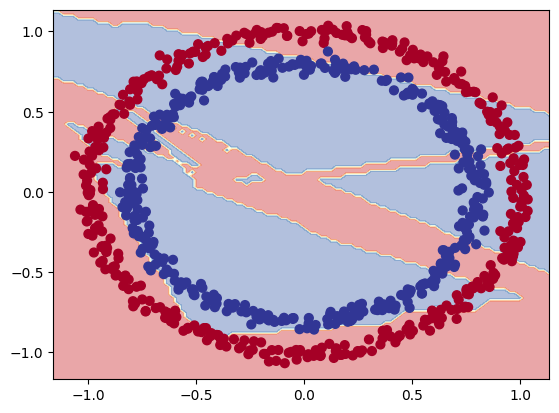

In [26]:
final_model = Sequential(layers=[
    Dense(input_size=2, output_size=10, activation='relu'),
    Dense(input_size=10, output_size=10, activation='relu'),
    Dense(input_size=10, output_size=1, activation='sigmoid')
])
from algorithms.utils import plot_decision_boundary
train_model(final_model, 5000, X_train, y_train)
plot_decision_boundary(final_model, X_train, y_train)

Validation accuracy: 0.735


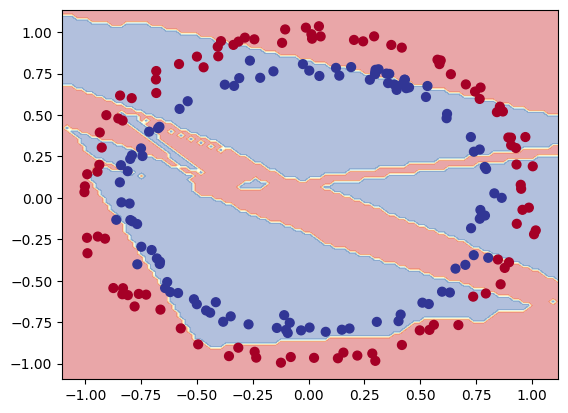

In [29]:
accuracy = compute_accuracy(np.round(final_model.forward(X_test)[:, 0]), y_test)

print("Validation accuracy:", accuracy)
plot_decision_boundary(final_model, X_test, y_test)


## Conclusions

- Try various simpler models first to see what they are achieiving.
- Then start with more complex models.